### Nhập thư viện cần thiết

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Load dữ liệu từ CSV

In [2]:
import pandas as pd
df = pd.read_csv("diabetes_prediction_dataset.csv")

X = df[["bmi", "HbA1c_level"]].astype(float).to_numpy()
y = df["diabetes"].astype(int).to_numpy()


In [3]:
# Tách train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

### Tạo mô hình SVM với dữ liệu đã chuẩn bị 

In [4]:
from sklearn import svm
clf = svm.LinearSVC(C=1.0, dual=False, max_iter=5000).fit(X_train, y_train) # LinearSVC thường nhanh hơn cho bài toán tuyến tính số mẫu lớn

### Dự đoán và đánh giá

In [5]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cls_rep = classification_report(
    y_test, y_pred,
    labels=[0, 1],
    target_names=["No diabetes", "Diabetes"],
)

### In kết quả ra màn hình ngay

In [6]:
# Độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))

# Ma trận nhầm lẫn
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Báo cáo chi tiết
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94
Confusion Matrix:
 [[18294    40]
 [ 1160   506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18334
           1       0.93      0.30      0.46      1666

    accuracy                           0.94     20000
   macro avg       0.93      0.65      0.71     20000
weighted avg       0.94      0.94      0.93     20000



## Vẽ biểu đồ

In [7]:
# Phạm vi theo percentile để tránh outlier kéo giãn lưới quá rộng
x_min, x_max = np.percentile(X_train[:, 0], [2, 98])
y_min, y_max = np.percentile(X_train[:, 1], [2, 98])
padx = 0.08 * (x_max - x_min if x_max > x_min else 1.0)
pady = 0.08 * (y_max - y_min if y_max > y_min else 1.0)
x_min, x_max = x_min - padx, x_max + padx
y_min, y_max = y_min - pady, y_max + pady


In [8]:
# Bước lưới thích ứng theo diện tích và mục tiêu số điểm 
area = max((x_max - x_min) * (y_max - y_min), 1e-6)
h = max(0.10, (area / 35_000) ** 0.5)
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 4.5))

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

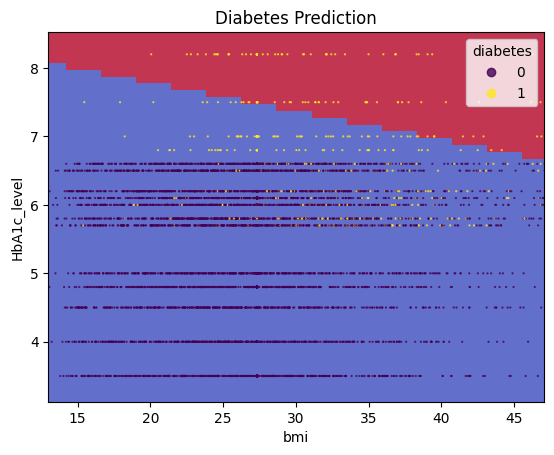

In [12]:
# pcolormesh thường nhanh hơn contourf với lưới thưa
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=plt.cm.coolwarm, alpha=0.8)
plot_idx = np.arange(X_train.shape[0])
X_plot = X_train[plot_idx]
y_plot = y_train[plot_idx]
# Chỉ vẽ một phần điểm train để dễ quan sát (train vẫn dùng full data)
plot_idx = np.arange(X_train.shape[0])
if plot_idx.size > 8_000:
    rng = np.random.default_rng(42)
    plot_idx = rng.choice(plot_idx, size=8_000, replace=False)
X_plot = X_train[plot_idx]
y_plot = y_train[plot_idx]

# Vẽ scatter tối ưu render + hiển thị vừa phải
scat = plt.scatter(
    X_plot[:, 0], X_plot[:, 1],
    c=y_plot, s=10, marker='.', edgecolors='none', rasterized=True, alpha=0.8
)
plt.legend(*scat.legend_elements(), loc="upper right", title="diabetes")
plt.xlabel("bmi"[0])
plt.ylabel("HbA1c_level"[1])
plt.xlabel("bmi")
plt.ylabel("HbA1c_level")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Diabetes Prediction")
plt.show()